# Tests for non mathematical attacks

In [1]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision
import numpy as np

print("PyTorch Version:", torch.__version__)
print("Torchvision Version:", torchvision.__version__)

PyTorch Version: 1.10.1+cu113
Torchvision Version: 0.11.2+cu113


In [2]:
ORIGINAL_DS_PATH = "../datasets/bing/test"
ADVERSARIALS_PATH = "../adversarial_samples/bing/math/FGSM/vgg/50_50"


In [3]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

toTensor = transforms.Compose([transforms.ToTensor()])
originalDataset = ImageFolder(ORIGINAL_DS_PATH, transform=toTensor)
advDataset = ImageFolder(ADVERSARIALS_PATH, transform=toTensor)

originalDataLoader = DataLoader(
    originalDataset, batch_size=3, shuffle=False, num_workers=0)

advDataLoader = DataLoader(
    advDataset, batch_size=3, shuffle=False, num_workers=0)


## Image tests

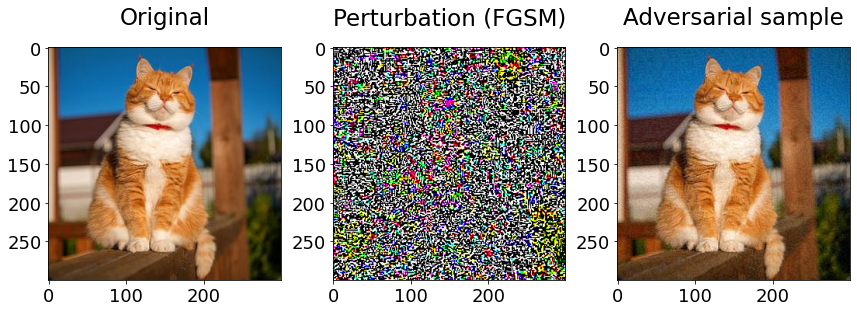

In [4]:
ticksSize = 18
padTitle = 23
titleSize = 23

plt.rc('xtick', labelsize=ticksSize)
plt.rc('ytick', labelsize=ticksSize)

getImages = np.array([False, True, False])

for (originalImages, originalLabels), (advImages, advLabels) in zip(originalDataLoader, advDataLoader):
    numImages = len(originalImages)

    rows = len(getImages[getImages])
    cols = 3
    figSize = (4 * cols, 4 * rows + 1)

    fig, axs = plt.subplots(rows, cols, figsize=figSize)

    row = 0
    for i, getImage in zip(range(numImages), getImages):
        if not getImage:
            continue
        
        if rows <= 1:
            axOriginal = axs[0]
            axAdv = axs[2]
            axDifference = axs[1]
        else:
            axOriginal = axs[row][0]
            axAdv = axs[row][2]
            axDifference = axs[row][1]

        originalImage = originalImages[i]
        advImage = advImages[i]
        differenceImage = advImage - originalImage
        
        originalImage = transforms.ToPILImage()(originalImage).convert("RGB")
        advImage = transforms.ToPILImage()(advImage).convert("RGB")
        differenceImage = transforms.ToPILImage()(differenceImage).convert("RGB")

        axOriginal.set_title("Original", pad=padTitle, fontsize=titleSize)
        axOriginal.imshow(originalImage)

        axAdv.set_title("Adversarial sample", pad=padTitle, fontsize=titleSize)
        axAdv.imshow(advImage)

        axDifference.set_title("Perturbation (FGSM)", pad=padTitle, fontsize=titleSize)
        axDifference.imshow(differenceImage)

        row += 1

    fig.tight_layout()
    fig.subplots_adjust(top=0.90, hspace=0.5)

    plt.show()

    for fmt in ["pdf", "png"]:
        fig.savefig("plots/{fmt}/catPerturbations.{fmt}".format(fmt=fmt),
                    facecolor=None,
                    dpi=500,
                    bbox_inches="tight",
                    pad_inches=.3)
    
    break